In [ ]:
import numpy as np
np.random.seed(123)
import pandas as pd
import pandas.testing as tm
import pandas.util.testing as tm
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm import tqdm_notebook
from sklearn.decomposition import TruncatedSVD
from pandas.plotting import scatter_matrix
import mglearn
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


# 1: loading the dataset

In [ ]:
# loading the train and test dataset
df_1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Case Study 1/mercedes-benz-greener-manufacturing/train.csv/train.csv')


In [ ]:
print(df_1.shape)
df_1=df_1.sort_values(by=['y'])
df_1.head()

(4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1594,3185,72.11,az,s,as,f,d,ad,j,n,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1871,3747,72.50,az,l,n,f,d,ah,g,s,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1803,3616,72.94,az,l,n,f,d,ae,a,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2926,5865,73.02,az,s,n,c,d,p,d,f,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1458,2902,73.15,az,l,n,f,d,ac,j,s,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


*    This dataset has 8 categorical features


*    and 369 numerical/ Binary features 
* That means those contain either 0 or 1

In [ ]:
df_1.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,0.142789,0.002613,0.086957,0.020670,0.001901,0.004989,0.682585,0.032549,0.043003,0.004514,0.232359,0.011167,0.000238,0.005464,0.232359,0.004514,0.232359,0.033262,0.000238,0.000713,0.011404,0.000238,0.072226,0.011404,0.253267,0.597292,0.012830,0.022333,...,0.022333,0.047517,0.0,0.947256,0.044904,0.338798,0.297220,0.054170,0.002138,0.202899,0.380375,0.179853,0.001188,0.426942,0.031837,0.076503,0.966025,0.520314,0.753861,0.002851,0.002851,0.001188,0.051794,0.062723,0.000475,0.006652,0.014255,0.000475,0.019244,0.227370,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,0.349899,0.051061,0.281805,0.142294,0.043561,0.070467,0.465526,0.177475,0.202888,0.067043,0.422387,0.105093,0.015414,0.073729,0.422387,0.067043,0.422387,0.179341,0.015414,0.026691,0.106192,0.015414,0.258893,0.106192,0.434934,0.490501,0.112552,0.147782,...,0.147782,0.212768,0.0,0.223549,0.207117,0.473357,0.457089,0.226379,0.046198,0.402205,0.485537,0.384110,0.034450,0.494693,0.175586,0.265832,0.181186,0.499647,0.430812,0.053325,0.053325,0.034450,0.221637,0.242492,0.021796,0.081300,0.118555,0.021796,0.137399,0.419183,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000

# 2:    % Null/Missing values in the dataset


*    Due to improper handling of missing values, the results obtained will differ from ones where missing values are present
*    That missing data can be left or do data imputation to replace them
*    In case of multivariate analysis, if there is a larger no of missing values, then it can be better to drop those cases(rather than to do imputation) and replace them
*    On other hand in univariate analysis, imputation can decrease the amount of bias in the data, if the values are missing at random
*    https://web.stanford.edu/class/stats202/content/lec25-cond.pdf

In [ ]:
df_1.isnull().sum().sum()

0

*    From the above output we got to know that there are no Null/Missing values in this dataset

*    Percentage of Missing values in this dataset is Zero => 0%

In [ ]:
x_1=df_1.drop(['y'], axis=1)
y=df_1['y']
print(x_1.shape, y.shape)

(4209, 377) (4209,)


# 3: Data Visualization



*   First let's take only Class variable and plot it on y_axis and it's resettled indices on the x_axis (array of numbers upto len(y))
*   Because id's are not continuous unit's 
*   Over plotting is one of the most common problem in dataviz. When your dataset is big, dots of your scatterplot tend overlap, hence we reduced the size of dots to accomodate more number of dots in a unit area



In [ ]:
print(len(y))
p=np.arange(len(y))

4209


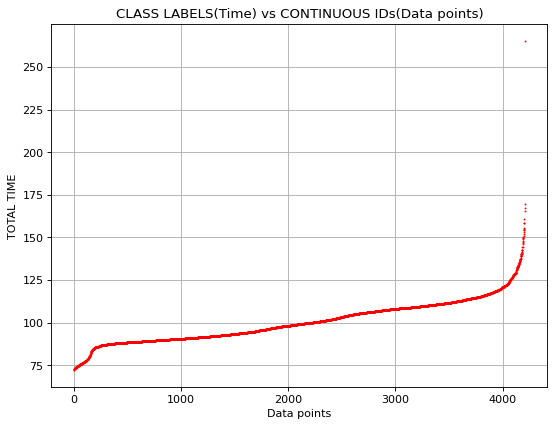

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# plot in seaborn is not so effective so we will plot in matplotlib
# plot using the Matplotlib
plt.plot(p,y, 'ro', markersize=0.7 )# https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/
plt.ylabel('TOTAL TIME')
plt.xlabel('Data points')
plt.grid()
plt.title('CLASS LABELS(Time) vs CONTINUOUS IDs(Data points)')
plt.show()

*   From the above diagram we can see that the class label(y-time) looks like a line 
*   But a small portion of points at the ends are not on the line
*   and also there's only one point whose time is above 250 which is an outlier

*    Because of all the class labels not lying on a line, the Metric R^2 square won't have large values, it's very sensitive to outliers, as SSres increases
*    The best possible R^2 Square value is 1.0 






---



---


#  4:  Plotting the PDF of Class variable

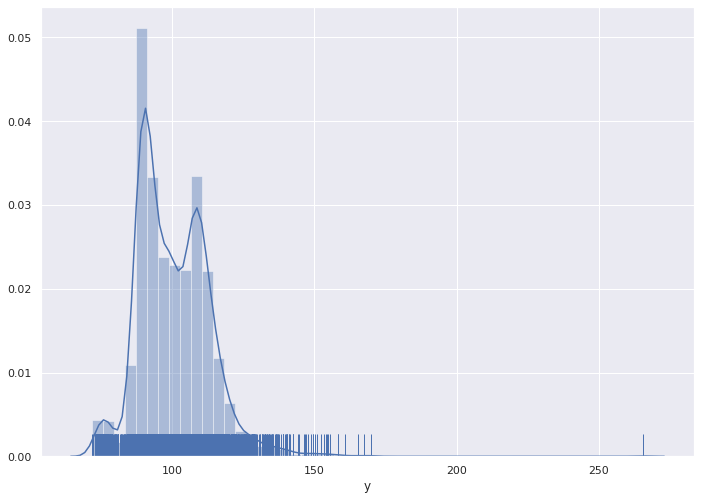

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.distplot(y, rug=True, hist=True)




---



---


# 5:  Plotting the CDF of Class variable

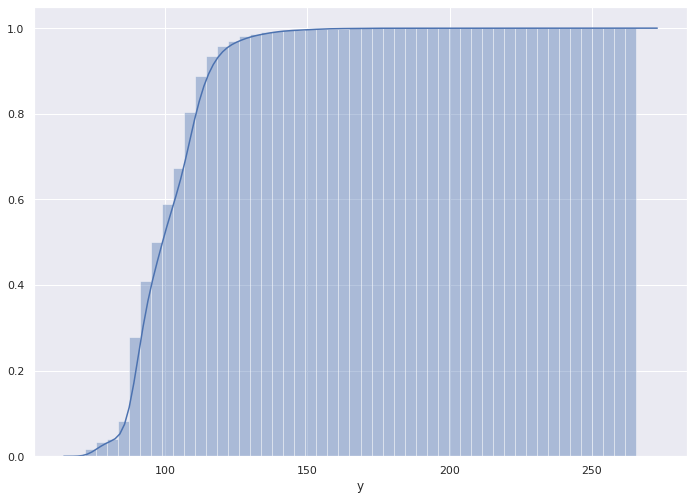

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True)) #https://geek-answers.github.io/articles/841259/index.html

* From the PDF and CDF we can see that, 
1. Almost all datapoints have Class variable below 140
2. so the points having class label more than 140 can be considered as outliers
3. Outliers must be discarded, because the metric R^2 is sensitive to outliers




---

# 6:    BoxPlot Univariate analysis, Y

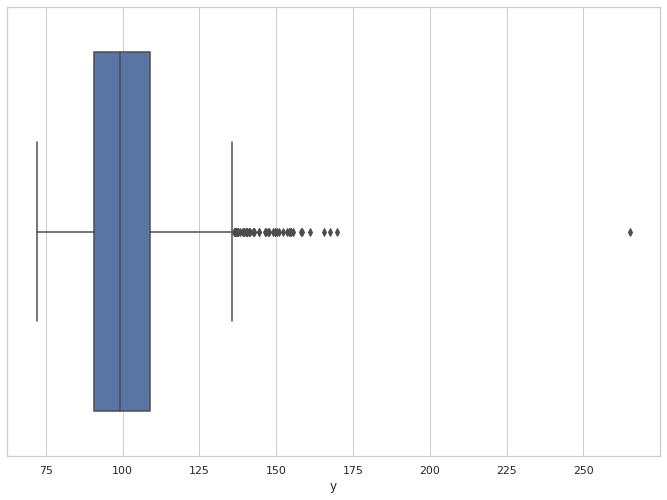

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_1["y"])

*    BoxPlot drawn with respect to class label, very beautifully shows the distribution of data based on a five numbered summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”) and here we can consider the values which are larger that max value as outliers



---

# 7:     Checking for Correlation between the features


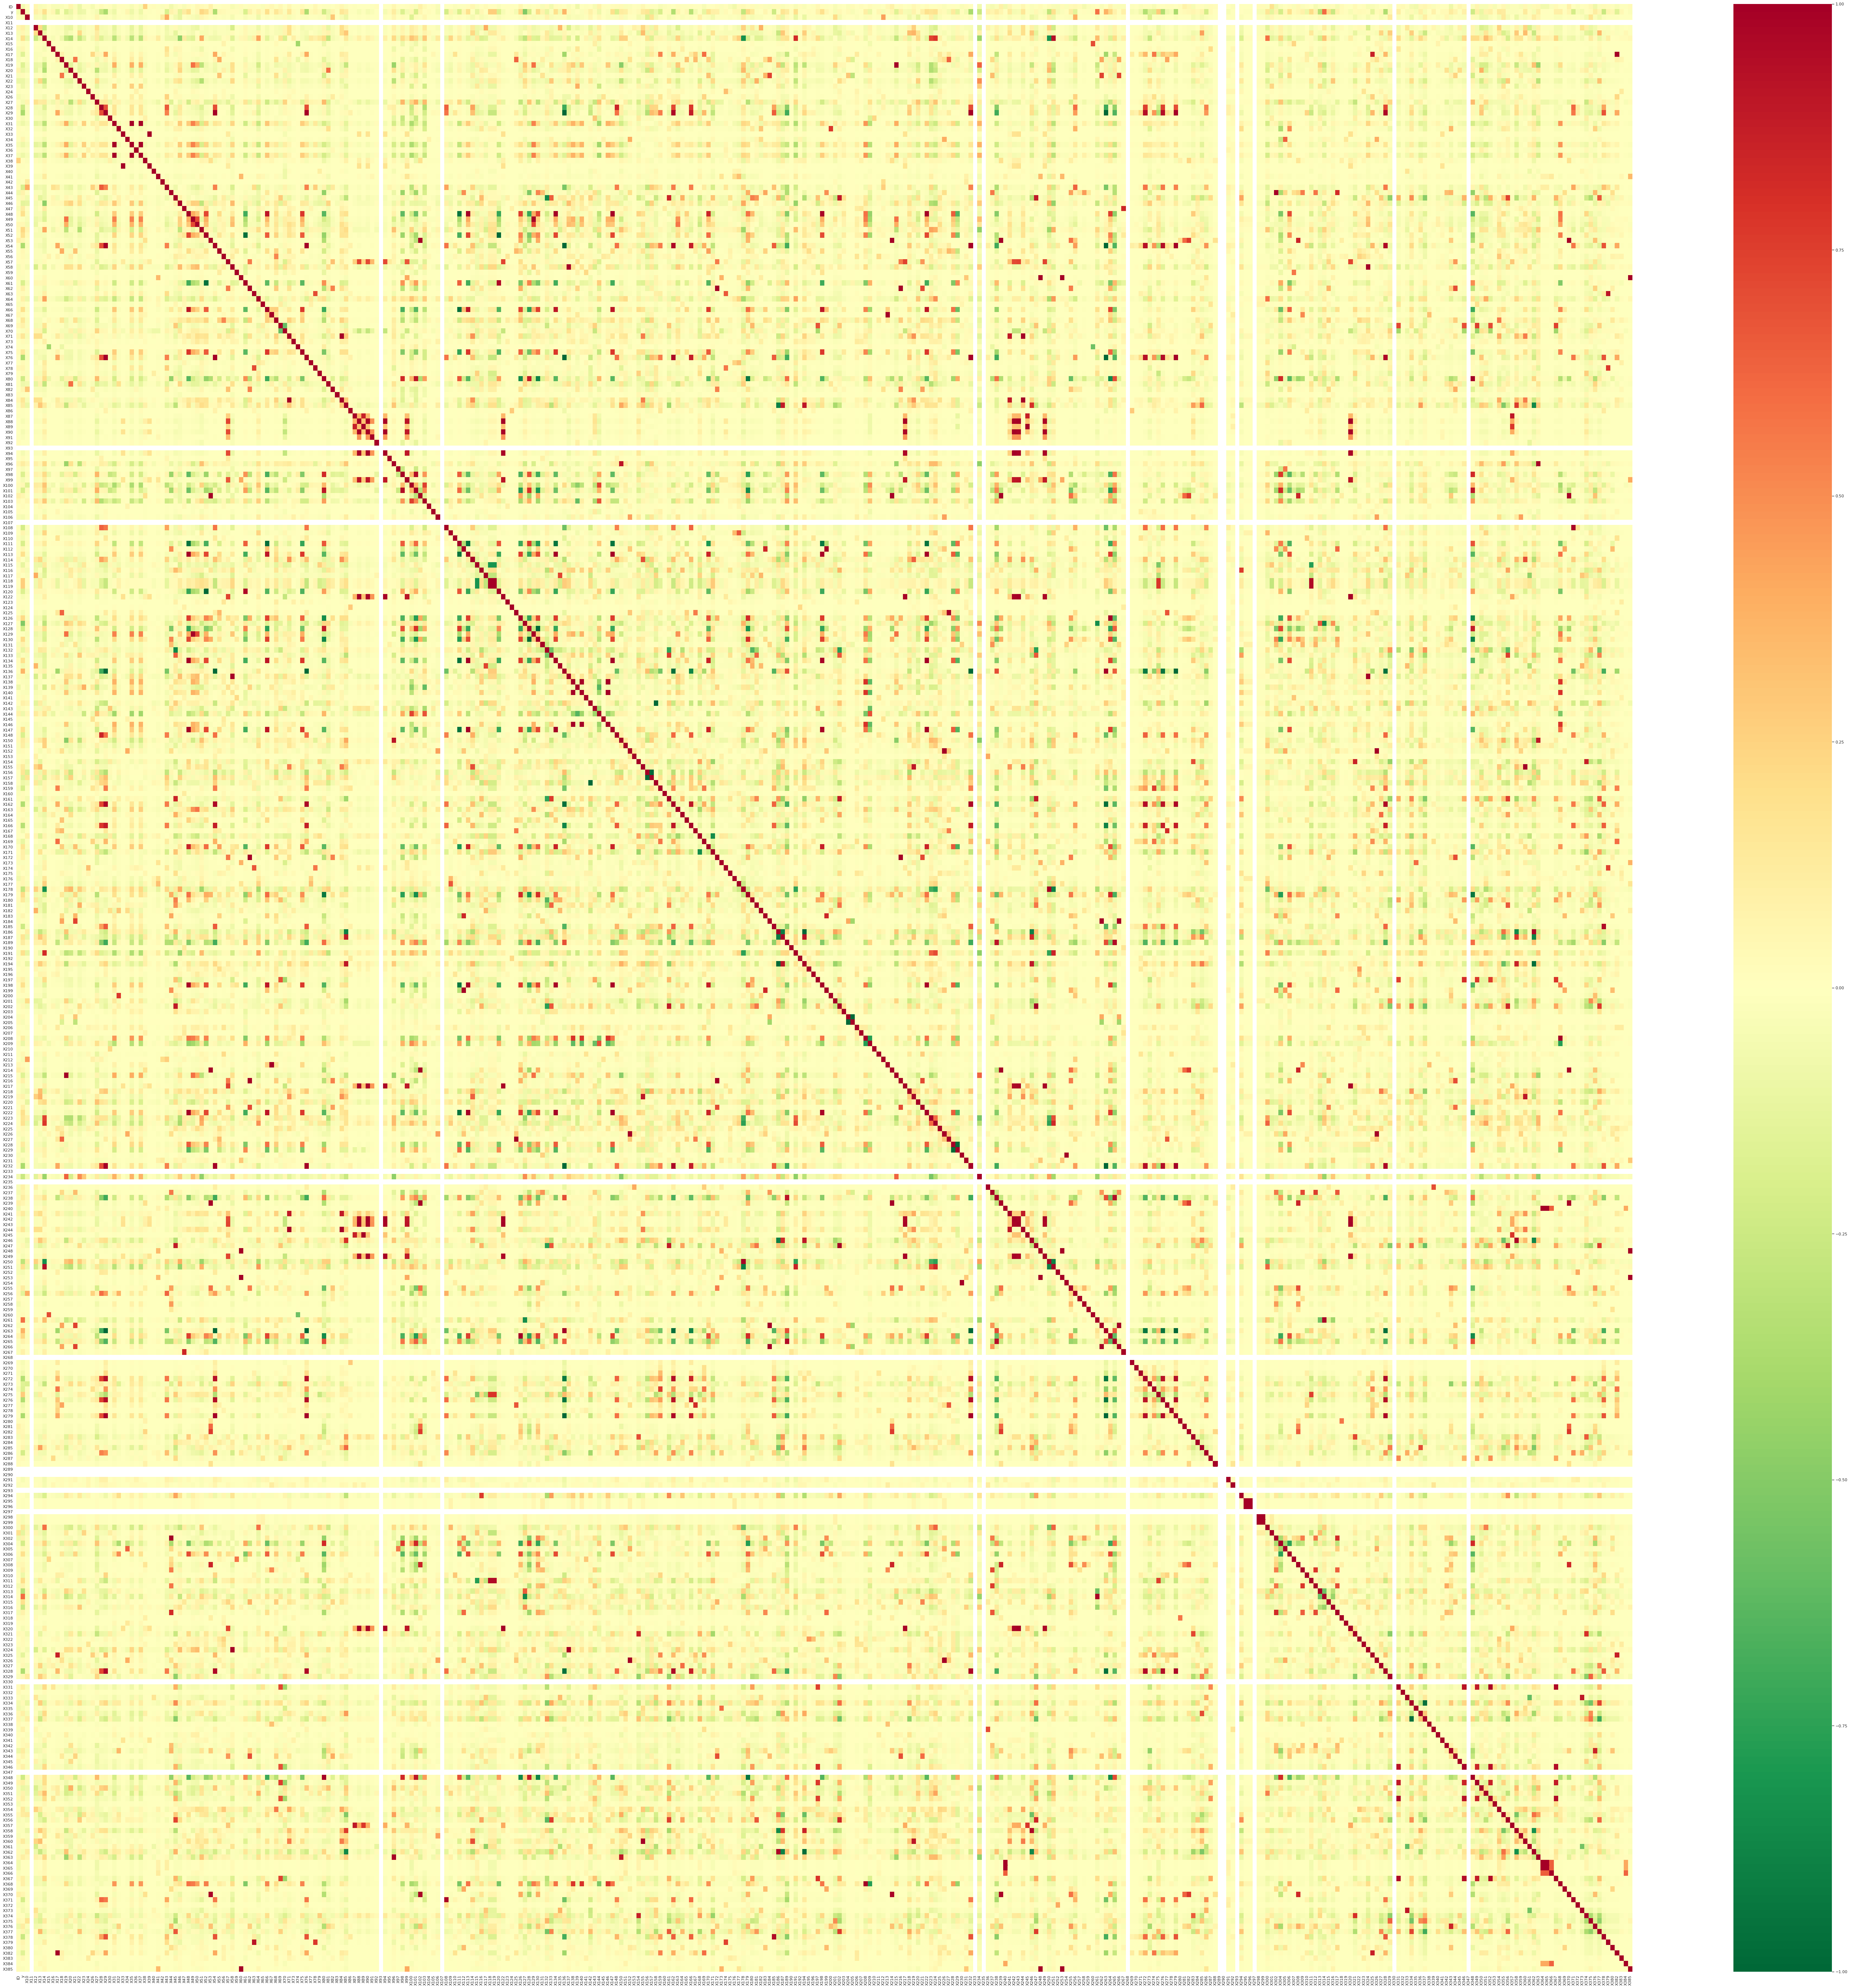

In [ ]:
plt.figure(figsize=(100,100))
sns.heatmap(df_1.corr(method='pearson'), cmap='RdYlGn_r')


*    From this heat map we get to know that out of these 369 features many features are completely collinear, some have correlation value of 1 and some have -1
*    Here complete Green and complete Red indicates the correlation value as 1 or -1
*    Multicollinearity is when two or more independent variables in a regression are highly related to one anothe, such that they do not provide unique or independent information to the regression
*    When the model tries to estimate their unique effects, it goes wonky
*    When you are building statistical learning models you don’t want to have variables that are extremely highly correlated to one another because that makes the coefficients of the variables unstable.
And when the coefficients are unstable, we can’t rely on the coefficient information, which is the most important piece of information you can get out of the models.
*    Hence we drop one of the variable of the two variables which have a very high correlation close to 1

# 8:    Checking for pairs of features with high correlation and dropping one from the pair

In [ ]:
# create correlation matrix # https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
corr_matrix=df_1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.999 or equal to 1
to_drop = [column for column in upper.columns if any(upper[column] >0.999)]

In [ ]:
print(to_drop)

['X35', 'X37', 'X39', 'X76', 'X84', 'X94', 'X102', 'X113', 'X119', 'X120', 'X122', 'X130', 'X134', 'X136', 'X146', 'X147', 'X157', 'X158', 'X172', 'X194', 'X199', 'X205', 'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X263', 'X266', 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X360', 'X364', 'X365', 'X382', 'X385']


In [ ]:
print(len(to_drop))

53


In [ ]:
# dropping the columns with high correlation
#df_1=df_1.drop(to_drop, axis=1)
df_1.shape

(4209, 378)

In [ ]:
# converting categorical features to numerical features
x_dummies=pd.get_dummies(df_1, prefix_sep='_', drop_first=True)
x_dummies.head()
#https://pandas.pydata.org/pandas-docs/version/0.21.1/generated/pandas.get_dummies.html
#https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,...,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
1594,3185,72.11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1871,3747,72.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1803,3616,72.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2926,5865,73.02,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1458,2902,73.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
x_dummies.corr().abs()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,...,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,1.000000,0.055108,0.001602,NaN,0.058988,0.031917,0.025438,0.002237,0.036480,0.038171,0.027063,0.012762,0.063216,0.029946,0.096610,0.010612,0.008972,0.048634,0.004214,0.030967,0.004175,0.015264,0.040157,0.013217,0.015306,0.008026,0.040157,0.011691,0.040157,0.256003,0.015306,0.018588,0.013301,0.022712,0.020923,0.074500,0.026850,0.012121,0.034911,0.017011,...,0.026602,0.323506,0.369383,0.037554,0.026564,0.028101,0.005580,0.031204,0.004822,0.009282,0.022214,0.003080,0.027374,0.030919,0.004628,0.049487,0.042456,0.011049,0.041700,0.012717,0.021645,0.017728,0.031802,0.006034,0.027904,0.035574,0.005160,0.021555,0.006477,0.068837,0.017778,0.004104,0.051908,0.026354,0.016087,0.012768,0.000879,0.012303,0.010427,0.011479
y,0.055108,1.000000,0.026985,NaN,0.089792,0.048276,0.193643,0.023116,0.048946,0.159815,0.001789,0.168895,0.095148,0.031111,0.094320,0.078676,0.003526,0.021173,0.053483,0.250288,0.379629,0.043247,0.086976,0.001750,0.014664,0.061151,0.086976,0.016999,0.086976,0.012614,0.014664,0.000918,0.012932,0.007076,0.195141,0.077690,0.046255,0.135958,0.113960,0.194418,...,0.036650,0.016847,0.037297,0.038230,0.014761,0.012620,0.023031,0.022304,0.038307,0.031910,0.016425,0.042284,0.015925,0.022395,0.011264,0.048668,0.020304,0.006847,0.011583,0.080735,0.086662,0.007147,0.037036,0.047091,0.004483,0.009115,0.028733,0.002824,0.029708,0.046267,0.015746,0.025100,0.054352,0.035122,0.011069,0.006558,0.022090,0.026756,0.026395,0.010169
X10,0.001602,0.026985,1.000000,NaN,0.033084,0.028806,0.100474,0.002532,0.005944,0.010164,0.010323,0.038610,0.047393,0.005944,0.035836,0.016870,0.005067,0.008223,0.070276,0.021300,0.024615,0.007820,0.044248,0.012340,0.001790,0.008608,0.044248,0.007820,0.044248,0.021539,0.001790,0.003101,0.012472,0.132754,0.400164,0.012472,0.062859,0.124508,0.005188,0.017551,...,0.001790,0.017541,0.027983,0.002532,0.001790,0.009503,0.011084,0.042660,0.006209,0.008024,0.008954,0.015260,0.022622,0.013580,0.008824,0.134894,0.014703,0.063578,0.018392,0.027596,0.028744,0.087139,0.019635,0.028365,0.022458,0.013899,0.018208,0.022706,0.010865,0.051923,0.049963,0.019635,0.027205,0.031354,0.080275,0.019807,0.015636,0.013701,0.005278,0.019549
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.058988,0.089792,0.033084,NaN,1.000000,0.214825,0.246513,0.006212,0.014584,0.024937,0.025327,0.094730,0.116280,0.014584,0.087924,0.041391,0.012433,0.020175,0.184599,0.052259,0.042617,0.019185,0.126861,0.030276,0.004392,0.021119,0.126861,0.019185,0.126861,0.017543,0.004392,0.007609,0.030600,0.004392,0.079493,0.030600,0.033104,0.054680,0.032480,0.043061,...,0.004392,0.022395,0.022395,0.006212,0.004392,0.009958,0.001402,0.073725,0.015234,0.019686,0.041298,0.027205,0.034814,0.117107,0.006919,0.019570,0.003193,0.044355,0.007394,0.080594,0.008673,0.068997,0.001184,0.090767,0.042894,0.017055,0.021108,0.022198,0.047130,0.015129,0.008926,0.026238,0.054569,0.045898,0.005797,0.038434,0.006170,0.037291,0.006457,0.012618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X8_u,0.012768,0.006558,0.019807,NaN,0.038434,0.025157,0.026224,0.003719,0.008731,0.014930,0.0

In [ ]:
print(x_dummies.corr().abs()['y'])

ID      0.055108
y       1.000000
X10     0.026985
X11          NaN
X12     0.089792
          ...   
X8_u    0.006558
X8_v    0.022090
X8_w    0.026756
X8_x    0.026395
X8_y    0.010169
Name: y, Length: 557, dtype: float64


# 9:    Checking for columns with Unique values

In [ ]:
# here correlation of x11 with class label y is NaN because that column contains
# only zeros
# hence we need to check for columns with only zeros and delete them
print(x_dummies.any())#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html#pandas.DataFrame.any

ID       True
y        True
X10      True
X11     False
X12      True
        ...  
X8_u     True
X8_v     True
X8_w     True
X8_x     True
X8_y     True
Length: 557, dtype: bool


In [ ]:
# creating a list of columns which have only zeros
zeros=[]
for i,j in x_dummies.any().items():#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iteritems.html
    if j==False:
        zeros.append(i)

In [ ]:
zeros # 'X339' is missing in my code
# we need to drop these columns

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

*   Dropping columns with only zeros

In [ ]:
x_dummies = x_dummies.drop(zeros, axis=1)

 # 10:   Dropping outliers => From the data retrived from boxplot 

In [ ]:
x_filtered= x_dummies[x_dummies['y']>70]#https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
x_filtered= x_filtered[x_filtered['y']<150]
x_filtered.describe()

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
count,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,...,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.00000,4194.000000,4194.000000,4194.00000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000
mean,4209.773724,100.439938,0.013352,0.074392,0.057940,0.428231,0.000477,0.002623,0.007630,0.007868,0.099666,0.142823,0.002623,0.086791,0.020744,0.001907,0.005007,0.682165,0.032666,0.043157,0.004530,0.231998,0.011206,0.000238,0.005484,0.231998,0.004530,0.231998,0.033381,0.000238,0.000715,0.011445,0.000238,0.072246,0.011445,0.253219,0.597282,0.012876,0.022413,0.122556,...,0.000238,0.054840,0.055079,0.000477,0.000238,0.006676,0.008822,0.148546,0.002861,0.004769,0.24702,0.045303,0.116357,0.24702,0.010014,0.113495,0.045303,0.023844,0.024082,0.053410,0.057940,0.030758,0.027897,0.056509,0.065808,0.041965,0.024082,0.036719,0.057701,0.038865,0.023605,0.027659,0.051741,0.060563,0.028135,0.028374,0.046257,0.046495,0.024797,0.027659
std,2437.897217,11.994753,0.114792,0.262439,0.233658,0.494881,0.021835,0.051152,0.087026,0.088365,0.299590,0.349934,0.051152,0.281562,0.142543,0.043638,0.070592,0.465690,0.177781,0.203234,0.067163,0.422158,0.105278,0.015441,0.073860,0.422158,0.067163,0.422158,0.179651,0.015441,0.026739,0.106380,0.015441,0.258926,0.106380,0.434907,0.490503,0.112751,0.148040,0.327966,...,0.015441,0.227695,0.228161,0.021835,0.015441,0.081445,0.093522,0.355682,0.053420,0.068899,0.43133,0.207992,0.320690,0.43133,0.099581,0.317235,0.207992,0.152580,0.153322,0.224876,0.233658,0.172683,0.164697,0.230930,0.247976,0.200532,0.153322,0.188094,0.233206,0.193296,0.151834,0.164012,0.221529,0.238555,0.165379,0.166058,0.210065,0.210580,0.155526,0.164012
min,0.000000,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2096.250000,90.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.

In [ ]:
print(x_filtered.shape)
y=x_filtered['y']


(4194, 545)


In [ ]:
x_filtered=x_filtered.drop(['y'], axis=1)
print(x_filtered.shape, y.shape)
print(type(x_filtered), type(y))

(4194, 544) (4194,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


*   Splitting data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_filtered, y, test_size=0.2, random_state=42)



---
# 11: Feature selection using recursive feature elimination




---



---



---



---





---



---



---



In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(bootstrap=True,
 max_depth=None, max_features='auto', max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=28, min_samples_split=111,
 min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
 oob_score=False, random_state=25, verbose=0, warm_start=False)

In [ ]:
# RFECV using RandomForestRegressor
selector = RFECV(clf)
selector = selector.fit(x_filtered, y)
important_features= x_filtered.columns[selector.get_support()]
important_features

Index(['X314'], dtype='object')

In [ ]:
# RFECV using XGBRegressor
import xgboost as xgb
clf_1=xgb.XGBRegressor()
selector = RFECV(clf_1)
selector = selector.fit(x_filtered, y)
important_features= x_filtered.columns[selector.get_support()]
important_features

[18:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Index(['X29', 'X314', 'X315'], dtype='object')

In [ ]:
# RFECV using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
clf_2=DecisionTreeRegressor(max_depth=5 )
selector = RFECV(clf_2)
selector = selector.fit(x_filtered, y)
important_features= x_filtered.columns[selector.get_support()]
important_features

Index(['X314'], dtype='object')

*    From the output of above three cell we have learn't that X314, X315 and X29 are the most important features and X314 is more important that X315 and X29

*    Using Recursive feature elimination we will find the top 20 important features and perform bivariate analysis on them 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(bootstrap=True,
 max_depth=None, max_features='auto', max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=28, min_samples_split=111,
 min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
 oob_score=False, random_state=25, verbose=0, warm_start=False)

In [ ]:
selector = RFE(clf, n_features_to_select=20)
selector = selector.fit(x_filtered, y)
top_20_features = x_filtered.columns[selector.get_support()]
top_20_features

Index(['ID', 'X29', 'X48', 'X54', 'X64', 'X76', 'X118', 'X119', 'X127', 'X136',
       'X189', 'X232', 'X263', 'X279', 'X311', 'X314', 'X315', 'X1_aa', 'X6_g',
       'X6_j'],
      dtype='object')

In [ ]:
# the above are the features when automatic feature selection is alloted  
# these features were selected as top 20 important features when number of features is taken as 20
top_20_features= ['ID', 'X29', 'X54', 'X58', 'X64', 'X118', 'X127', 'X132', 'X189',
       'X218', 'X224', 'X273', 'X311', 'X314', 'X315', 'X0_z', 'X1_aa', 'X2_s',
       'X6_g', 'X6_j']
type(top_20_features)ho

list

In [ ]:
type(x_filtered)

pandas.core.frame.DataFrame

In [ ]:
x_filtered[top_20_features]

,ID,X29,X54,X58,X64,X118,X127,X132,X189,X218,X224,X273,X311,X314,X315,X0_z,X1_aa,X2_s,X6_g,X6_j
1594,3185,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
1871,3747,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
1803,3616,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
2926,5865,1,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0
1458,2902,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,5820,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,1
681,1322,0,0,1,0,1,0,0,1,1,0,1,1,1,0,0,0,0,1,0
2376,4762,0,0,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0
4176,8344,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1


# 12:    Bivariate analysis for the top 20 features

In [ ]:
! pip install mglearn

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=995e3253e89dcef25350c50efed5b68c6bda782754dc44d3e096a74eb96fd747
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


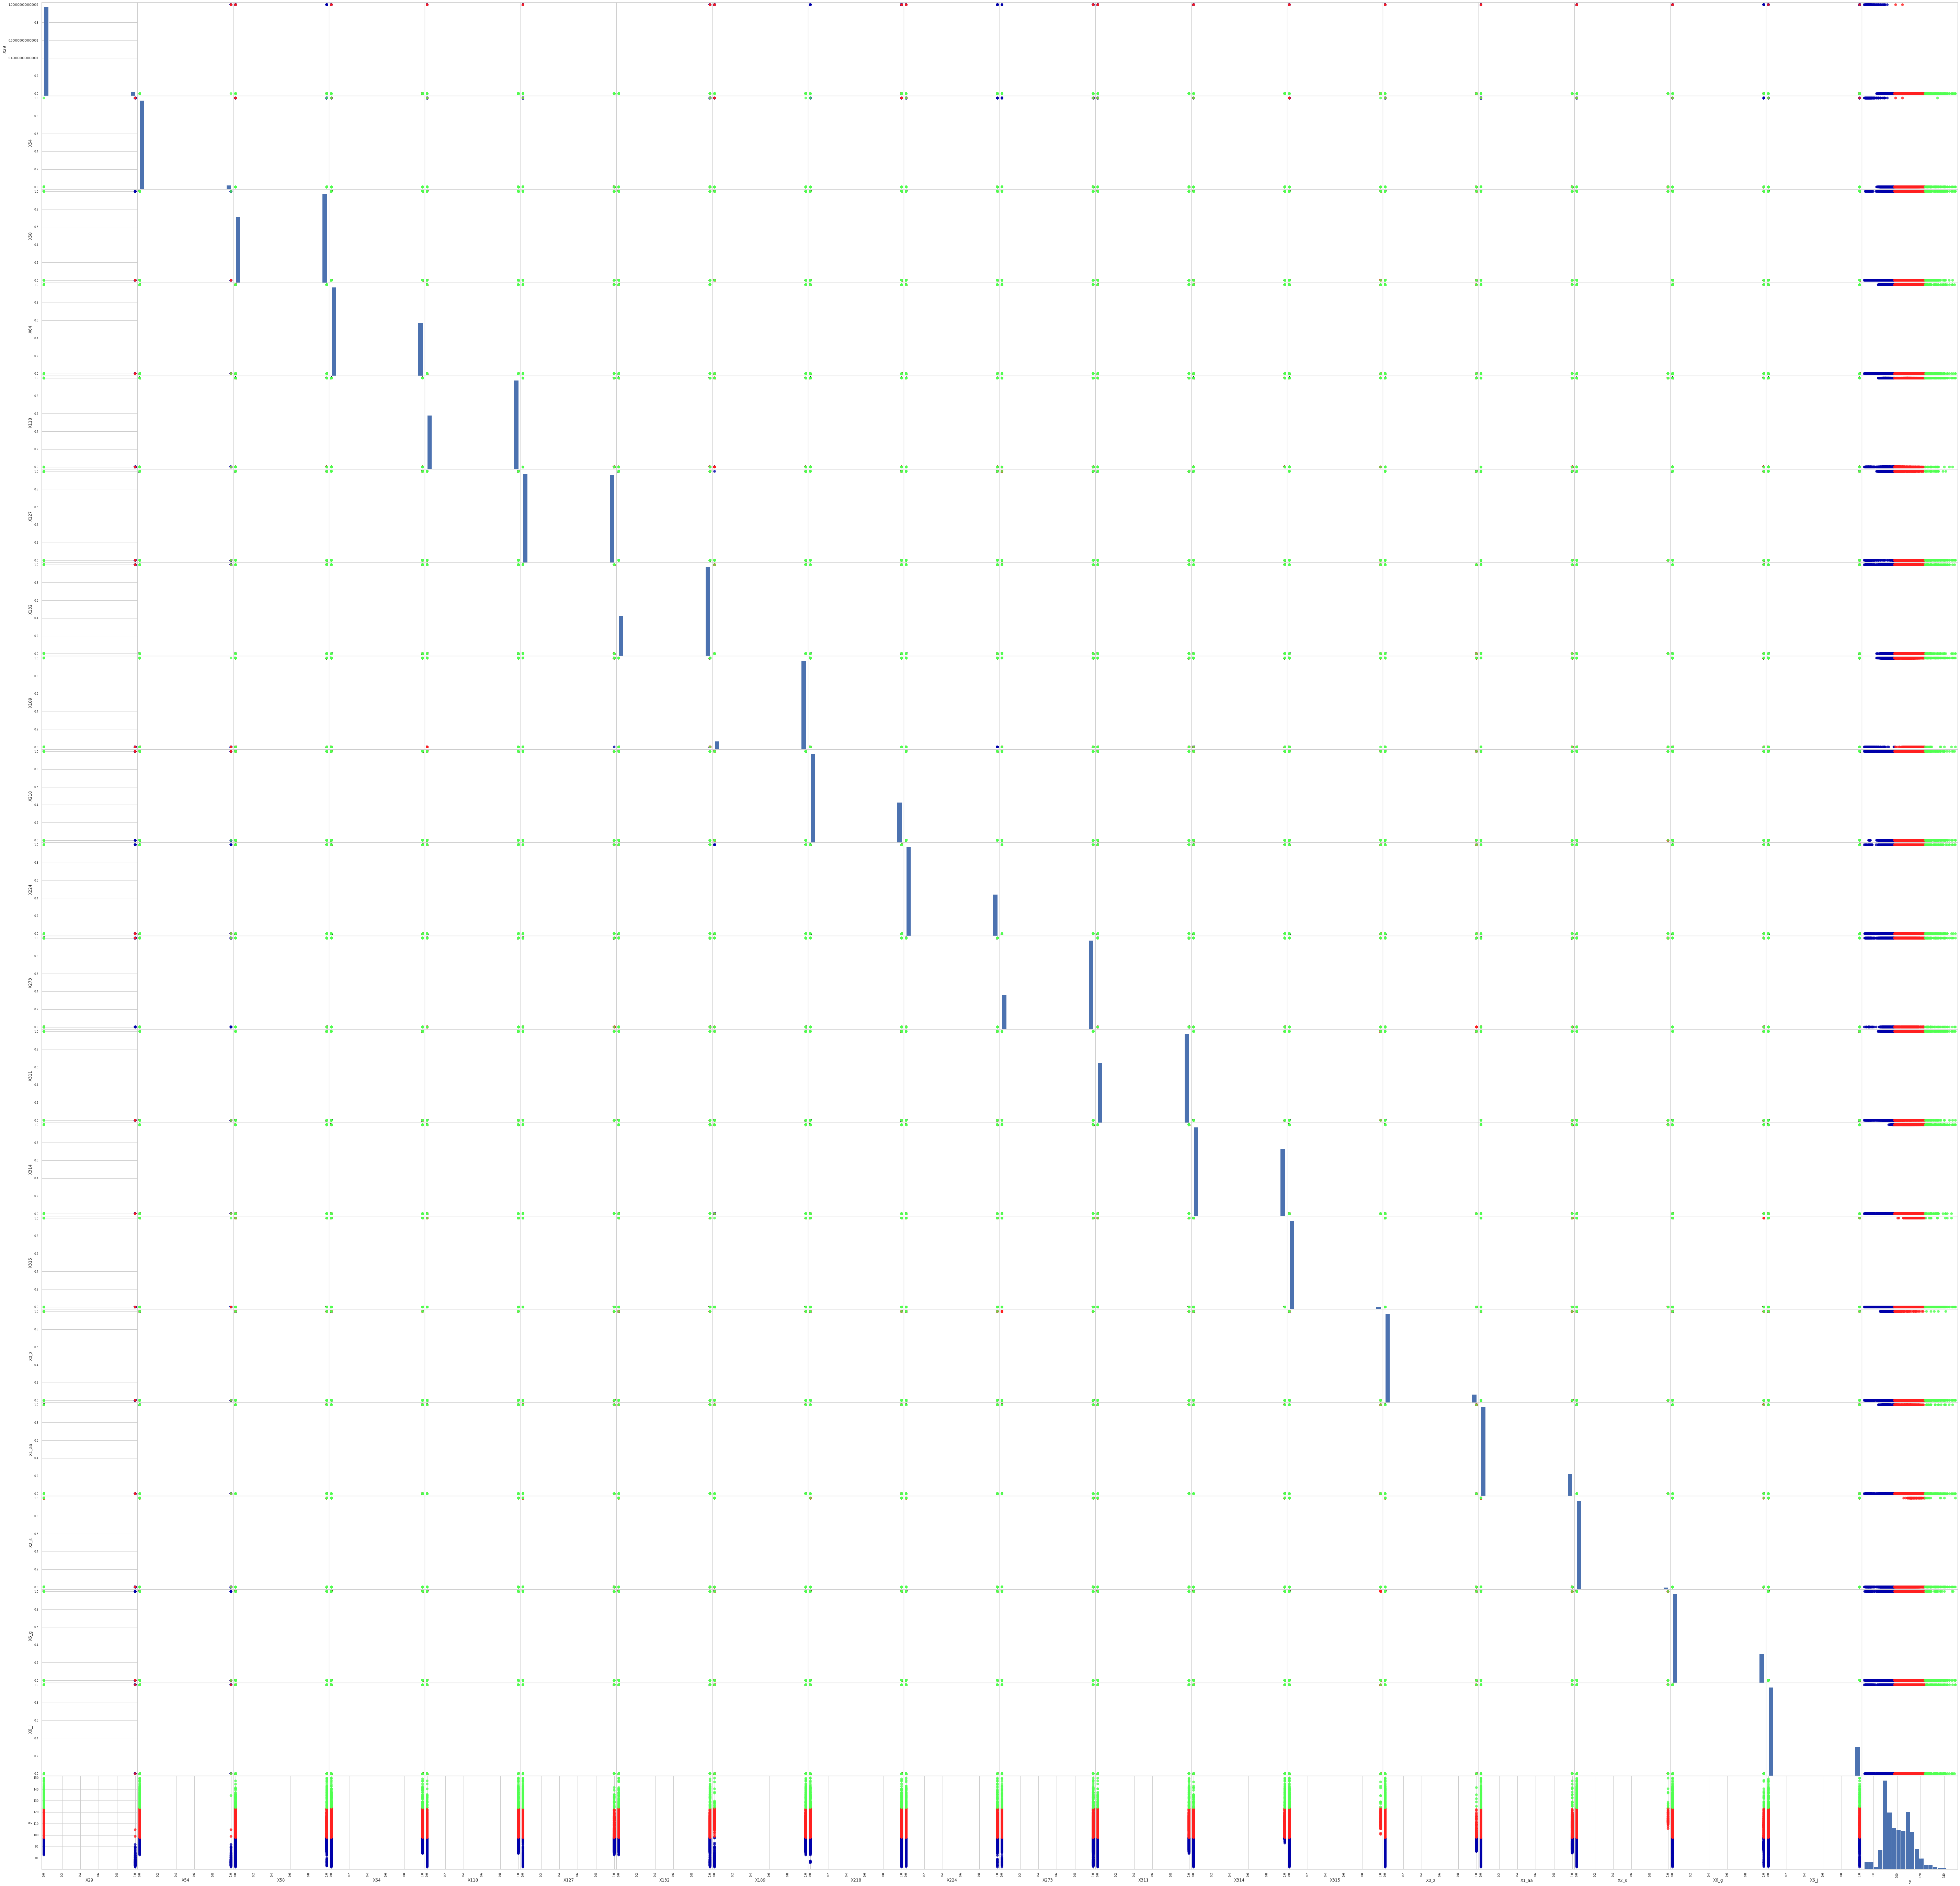

In [ ]:
from pandas.plotting import scatter_matrix
import mglearn
sns_df= x_filtered[top_20_features]
sns_df=sns_df.drop('ID',axis=1)
sns_df['y']=y
grr = scatter_matrix(sns_df,c =y,figsize = (100,100),marker = 'o',
                        hist_kwds={'bins':20},s=60,alpha=.8,cmap = mglearn.cm3)
plt.show()

*    a plot similar to this plot is plotted below and is explained

In [ ]:
sns_df.columns

Index(['X29', 'X54', 'X58', 'X64', 'X118', 'X127', 'X132', 'X189', 'X218',
       'X224', 'X273', 'X311', 'X314', 'X315', 'X0_z', 'X1_aa', 'X2_s', 'X6_g',
       'X6_j', 'y'],
      dtype='object')

In [ ]:
print(type(top_20_features))
top_20_features

<class 'list'>


['ID',
 'X29',
 'X54',
 'X58',
 'X64',
 'X118',
 'X127',
 'X132',
 'X189',
 'X218',
 'X224',
 'X273',
 'X311',
 'X314',
 'X315',
 'X0_z',
 'X1_aa',
 'X2_s',
 'X6_g',
 'X6_j']

*    Boxplot of top 20 features

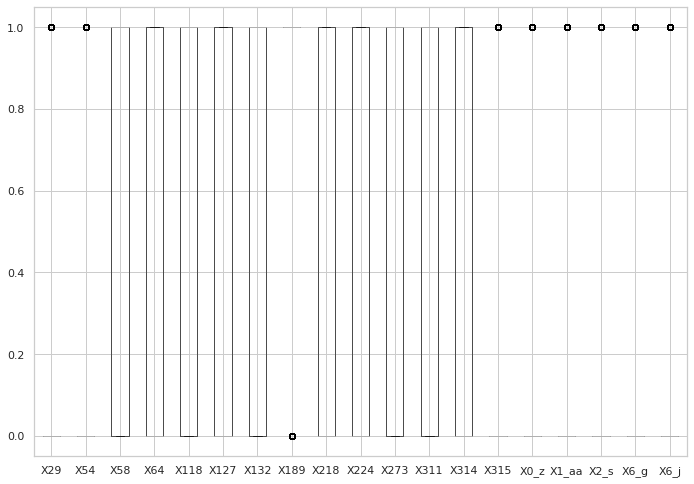

In [ ]:
sns_df=sns_df.drop('y',axis=1)
sns_df.boxplot(column=top_20_features.remove('ID'))

In [ ]:
sns_df.X54.value_counts()

0    4012
1     182
Name: X54, dtype: int64

*    From the above plot we can see that out of these 20 important features only X58, X64, X118, X127, X132, X218, X224, X273, X311, X314 have number of zeros and ones balanced, other have either almost all ones or almost all zeros
*    hence those other 10 features are not that important, because they don't provide useful information
*    they are similar to columns which have all zero's and all one's



---

# 13:     Detecting Multicollinearity using VIF (Variable Inflation Factor)


https://www.sigmamagic.com/blogs/what-is-variance-inflation-factor/#:~:text=If%20there%20is%20perfect%20correlation,to%20the%20presence%20of%20multicollinearity.


https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/


*    VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable
*    VIF - Conclusion 
    
     1             = No Multicollinearity

     4-5           = Moderate

     10 or greater = Severe

*    Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model
*    This means that one independent variable can be predicted from another independent variable in a regression model
*    This can be a problem in a regression model because we would not be able to distinguish between the individf_1.isnull().sum().sum()dual effects of the independent variables on the dependent variable.
*    Multicollinearity may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features on the model. and that can be a problem when it comes to interpretability

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculationg VIF
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in tqdm_notebook(range(X.shape[1]))]

    return (vif)


In [ ]:
vif_values=calc_vif(x_filtered)

In [ ]:
vif_values.head()

,variables,VIF
0,ID,487.143315
1,X10,inf
2,X12,inf
3,X13,inf
4,X14,inf


In [ ]:
vif_values=vif_values.sort_values(by='VIF', ascending=True)

In [ ]:
vif_values.head()

,variables,VIF
173,X190,1.077204
305,X332,1.101729
31,X42,1.125967
267,X288,1.128819
91,X104,1.170182


In [ ]:
lst_variables= list(vif_values['variables'])
lst_variables[0:5]

['X190', 'X332', 'X42', 'X288', 'X104']

In [ ]:
lst_vif= list(vif_values['VIF'])
lst_vif[0:5]

[1.0772040419357851,
 1.101729119950782,
 1.125967315870098,
 1.1288191495521722,
 1.170182327750057]

In [ ]:
vif_dict = dict(zip(lst_variables, lst_vif))

In [ ]:
type(lst_vif[1])

float

In [ ]:
np.isinf(lst_vif[0])

False

In [ ]:
inf_indices=[]
count=0
for k,v in vif_dict.items():
    if np.isinf(v):
        inf_indices.append(k)
        count+=1


In [ ]:
count

373

In [ ]:
len(inf_indices)

373

In [ ]:
 for i in inf_indices:
     print(vif_dict[i])

inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


In [ ]:
inf_indices

['X184',
 'X1_v',
 'X1_u',
 'X1_t',
 'X1_s',
 'X1_r',
 'X1_q',
 'X1_p',
 'X1_o',
 'X1_n',
 'X1_l',
 'X1_k',
 'X1_j',
 'X1_i',
 'X1_h',
 'X1_g',
 'X1_f',
 'X1_e',
 'X1_d',
 'X1_c',
 'X1_m',
 'X1_w',
 'X1_y',
 'X1_z',
 'X2_av',
 'X2_au',
 'X2_at',
 'X2_as',
 'X2_ar',
 'X2_aq',
 'X2_ap',
 'X2_ao',
 'X2_an',
 'X2_am',
 'X2_al',
 'X2_ak',
 'X2_ai',
 'X2_ah',
 'X2_ag',
 'X2_af',
 'X2_ae',
 'X2_ac',
 'X2_aa',
 'X1_b',
 'X1_ab',
 'X0_z',
 'X2_aw',
 'X0_b',
 'X0_az',
 'X0_ay',
 'X0_ax',
 'X0_aw',
 'X0_au',
 'X0_at',
 'X0_as',
 'X0_aq',
 'X0_ap',
 'X0_ao',
 'X0_am',
 'X0_al',
 'X0_ak',
 'X0_aj',
 'X0_ai',
 'X0_af',
 'X0_ad',
 'X0_ac',
 'X0_ba',
 'X0_bc',
 'X0_c',
 'X0_d',
 'X0_y',
 'X0_x',
 'X0_w',
 'X0_v',
 'X0_u',
 'X0_t',
 'X0_s',
 'X0_r',
 'X0_q',
 'X1_aa',
 'X0_o',
 'X0_m',
 'X0_l',
 'X0_k',
 'X0_j',
 'X0_i',
 'X0_h',
 'X0_g',
 'X0_f',
 'X0_e',
 'X0_n',
 'X2_ay',
 'X2_b',
 'X2_c',
 'X37',
 'X39',
 'X40',
 'X41',
 'X43',
 'X44',
 'X48',
 'X52',
 'X53',
 'X54',
 'X5_x',
 'X58',
 'X59',
 'X5_u

In [ ]:
print(x_filtered.shape)
x_filtered = x_filtered.drop(inf_indices, axis=1)
print(x_filtered.shape)

(4194, 544)
(4194, 171)




---



---



# 14: Finding the "k" in Truncated SVD, Gavish-Donoho method

In [ ]:
# with reference to the research paper
U, s, V = np.linalg.svd(x_filtered)

In [ ]:
print(U.shape, s.shape, V.shape)

(4194, 4194) (171,) (171, 171)


In [ ]:
def omega_approx(beta):
    """Return an approximate omega value for given beta. Equation (5) from Gavish 2014."""
    return 0.56 * beta**3 - 0.95 * beta**2 + 1.82 * beta + 1.43



In [ ]:
beta = min(x_filtered.shape) / max(x_filtered.shape)
tau = np.median(s) * omega_approx(beta)


In [ ]:
print(tau)
print(np.log(tau))

15.625431208108179
2.74889979256059


In [ ]:
# initializing normally distributed matrix of size equal to to size of x_filtered, mean =0, variance=1
noise = np.random.normal(0, 1, (4194, 171))
noise.shape

(4194, 171)

In [ ]:
# getting the singular values of the noise  matrix
U_n, s_n, V_n = np.linalg.svd(noise)
print(U_n.shape, s_n.shape, V_n.shape)

(4194, 4194) (171,) (171, 171)


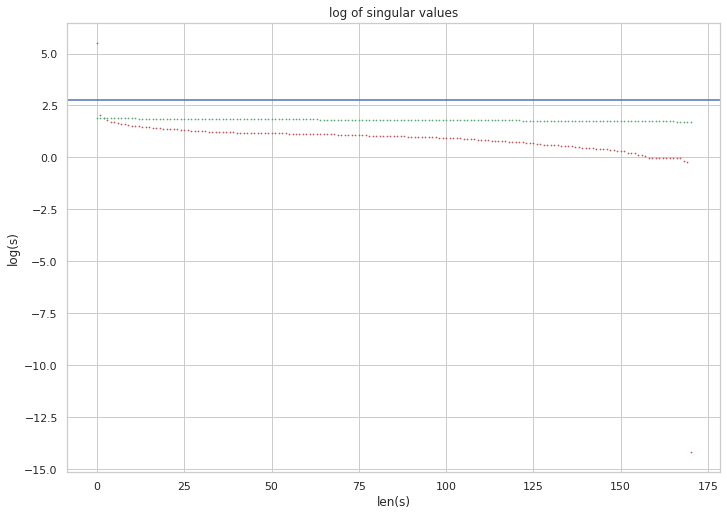

In [ ]:
plt.plot(np.arange(s.shape[0]),np.log10(s), 'ro', markersize=0.7 )# https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/
plt.plot(np.arange(s_n.shape[0]), np.log10(s_n), 'go', markersize=0.7)
plt.axhline(y=np.log(tau))
plt.grid()
plt.ylabel('log(s)')
plt.xlabel('len(s)')
plt.grid()
plt.title('log of singular values')
plt.show()

In [ ]:
np.log10(s)

array([ 5.49835947e+00,  2.05560811e+00,  1.88757128e+00,  1.81049591e+00,
        1.72117703e+00,  1.70295560e+00,  1.64684852e+00,  1.62229745e+00,
        1.59749869e+00,  1.58201726e+00,  1.53296004e+00,  1.51470234e+00,
        1.51152991e+00,  1.48377355e+00,  1.45481248e+00,  1.44696397e+00,
        1.42949293e+00,  1.41391183e+00,  1.39801768e+00,  1.38977264e+00,
        1.38099787e+00,  1.36580978e+00,  1.35579799e+00,  1.34862606e+00,
        1.33313348e+00,  1.31190029e+00,  1.29670468e+00,  1.29184301e+00,
        1.28143647e+00,  1.27740450e+00,  1.26874118e+00,  1.25236426e+00,
        1.24481662e+00,  1.23015155e+00,  1.22557708e+00,  1.21787538e+00,
        1.21416669e+00,  1.21106442e+00,  1.20568326e+00,  1.19992083e+00,
        1.19014226e+00,  1.18568751e+00,  1.18355040e+00,  1.17863663e+00,
        1.17774804e+00,  1.17496842e+00,  1.17200251e+00,  1.16675742e+00,
        1.16468713e+00,  1.16208161e+00,  1.15951206e+00,  1.15873570e+00,
        1.15527849e+00,  

*    From the graph and the values of tau retrived with reference to the research paper, the number of components of SVD that contain maximum variance is either 1 or 2
*    Because 2 points of the singular values of original matrix got deviated from the noise matrix's singlar values, of which one has a very high deviation above the tau value calculated

# 15:     Finding the right 'k' for TruncatedSVD

Number of components = 0 and explained variance = 0.0
Number of components = 1 and explained variance = 0.9999940231462716
Number of components = 2 and explained variance = 0.9999953303645566
Number of components = 3 and explained variance = 0.9999958739191878
Number of components = 4 and explained variance = 0.9999962431192436
Number of components = 5 and explained variance = 0.9999965922212577
Number of components = 6 and explained variance = 0.9999968441840766
Number of components = 7 and explained variance = 0.9999970539521559
Number of components = 8 and explained variance = 0.9999972554192132
Number of components = 9 and explained variance = 0.9999974117228234
Number of components = 10 and explained variance = 0.999997541155255
Number of components = 11 and explained variance = 0.9999976625639638
Number of components = 12 and explained variance = 0.9999977663762031
Number of components = 13 and explained variance = 0.9999978563428785
Number of components = 14 and explained varian

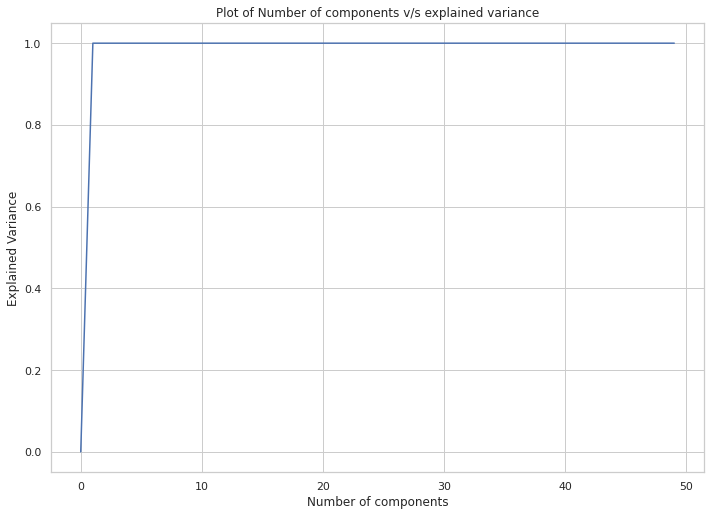

In [ ]:
# https://medium.com/swlh/truncated-singular-value-decomposition-svd-using-amazon-food-reviews-891d97af5d8d
from sklearn.decomposition import TruncatedSVD
# Program to find the optimal number of components for Truncated SVD
n_comp = np.arange(50) # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(x_filtered)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

*    From the above graph we can see that, Number of components = 1 it self  explained variance = 0.999994605318489
*   That means considering the top most important feature of svd is also enough to preserve maximum variance, or we can consider upto 3 based the variance we anticipate to preserve

#  16: Adding new features to the dataframe using dimensionality reduction techniques

In [ ]:
from sklearn.decomposition import TruncatedSVD
tsvd= TruncatedSVD(n_components=2, random_state=42)
tsvd_train= tsvd.fit_transform(x_filtered)
#tsvd_test=  tsvd.transform(x_dummies_2)

In [ ]:
tsvd_train.shape

(4194, 2)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_train= pca.fit_transform(x_filtered)
#pca_test= pca.transform(x_dummies_2)

In [ ]:
pca_train.shape

(4194, 2)

In [ ]:
from sklearn.decomposition import FastICA
ica=FastICA(n_components=2, random_state=42)
ica_train= ica.fit_transform(x_filtered)
#ica_test= ica.transform(x_dummies_2)

In [ ]:
ica_train.shape

(4194, 2)

In [ ]:
for i in range(0, tsvd_train.shape[1]):
    x_filtered['tsvd_'+str(i)]= tsvd_train[:, i]
    #x_dummies_2['tsvd_'+str(i)]= tsvd_test[:, i]
    x_filtered['pca_'+str(i)]= pca_train[:, i]
    #x_dummies_2['pca_'+str(i)]= pca_test[:, i]
    x_filtered['ica_'+str(i)]= ica_train[:, i]
    #x_dummies_2['ica_'+str(i)]= ica_test[:, i]

In [ ]:
print(x_filtered.shape)#, x_dummies_2.shape)

(4194, 180)


# 17: Adding new features using the top important features

In [ ]:
# out of all the top_20_important features, after all the processing ['X315', 'X54', 'X1_aa', 'X58', 'X314', 'X2_s', 'X189', 'X118', 'X311', 'X29', 'X127', 'X132', 'X0_z']
# the above features are dropped and X64, X218, X224, X273 these four features are present, so let's generate new features from these 4 features


In [ ]:
x_filtered['X64 + X218']=x_filtered['X64']+x_filtered['X218']
#x_dummies_2['X64 + X218']=x_dummies_2['X64']+x_dummies_2['X218']

x_filtered['X218 + X224 + X273']=x_filtered['X218']+x_filtered['X224'] + x_filtered['X273']
#x_dummies_2['X218 + X224 + X273']=x_dummies_2['X218']+x_dummies_2['X224'] + x_dummies_2['X273']

x_filtered['X64 + X224 + X273']=x_filtered['X64']+x_filtered['X224'] + x_filtered['X273']
#x_dummies_2['X64 + X224 + X273']=x_dummies_2['X21864']+x_dummies_2['X224'] + x_dummies_2['X273']



# 18: Summary of FE and EDA



1.   First thing after loading the data, the results of null value analysis said that, data contains 0% null values. 
2.   From Data visualization, PDF, CDF and Box plot it's confirmed that data contains outliers and were dropped.
3.   Using the Recursive Feature Elimination (using RandomForestRegressor from sklearn), top 20 features are calculated and bivariate analysis is done, from which 10 features had balanced 0's and 1's while other 10 have either almost all 0's or 1's which are similar to features with single value, hence can be considered as not important
4.   The results of finding Correlation between features, arised the doubt of multicollinearity. For which we have done Multicollinearity detection using the VIF(Variable Inflation Factor) and features which have a VIF value of inf are dropped.
5.   To add new features using SVD, calculation of "k" in Truncated SVD is done in 2 ways:
*    one is just by plotting the "Explained variance(by the features)" VS "no of
Features", and 
*    the other method is using the Gavish-Donoho method, by plotting the graph of "log of singular values" vs "number of components" 
6.   Now after dropping the features using VIF excluding the top_20_features
7.   using 2 way and 3 way interaction between them new features are generated



